## House Prices: Advanced Regression Techniques
### Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [ ]:
NAME = "Tyler Cranmer"
COLLABORATORS = ""

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import scipy as sp
import scipy.stats as stats
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
from scipy.stats import norm
from scipy.stats import skew 
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
test_df = pd.read_csv('/content/drive/MyDrive/kaggle/test.csv')
df = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')
train_ID = df['Id']
test_ID = test_df['Id']

## Inspection of the Data and missing values

In [4]:
# Helps visualize the shape of the two dataframes./
print("Training data shape: ", df.shape)
print("Test data shape: ", test_df.shape)

Training data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [5]:
#Training Data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Test Data 
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


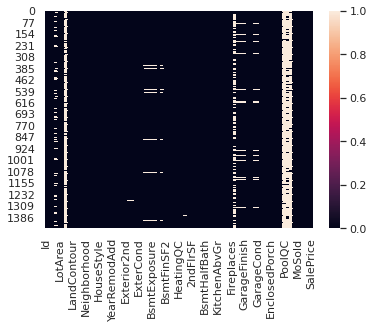

In [7]:
# Heat map of training data to visually see what category the null values are for cleaning.
sns.heatmap(df.isnull());

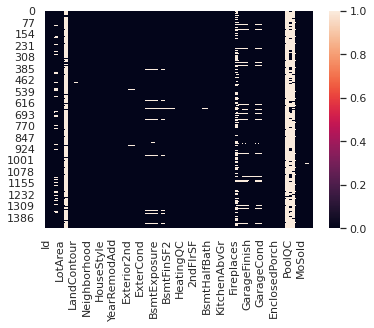

In [8]:
# Heat map of Testing data to visually see what category the null values are for cleaning.
sns.heatmap(test_df.isnull());

In [9]:
# Data frame that shows the number of null values for both training data and testing data.
# This made it easy to see how many values were missing for eaach category
Null_Values = pd.concat([df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['df', 'test_df'])
Null_Values[Null_Values.sum(axis=1) > 0]

,df,test_df
MSZoning,0,4.0
LotFrontage,259,227.0
Alley,1369,1352.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtQual,37,44.0
BsmtCond,37,45.0


In [10]:
# Used to see what types of data each catatory is to help with filling in Null Values
# The Categories with object data will be used be treated differently in the regression model
# Also, when filling in the nullValues, you need to figure out what object category is 
# best use as a replacement
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [11]:
#Drop All Columns with more than 1000 Null Values in them. 

df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop(['GarageYrBlt'],axis=1,inplace=True)



test_df.drop('Alley', axis=1, inplace=True)
test_df.drop('PoolQC', axis=1, inplace=True)
test_df.drop('Fence', axis=1, inplace=True)
test_df.drop('MiscFeature', axis=1, inplace=True)
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)


df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [12]:
# Used Value_counts() to understand the data of different catagories with null values
# I cycled through each one.
test_df['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [13]:
# Data cleaning
# Categories with missing data that were considered nonobjects, 
# I replaced the null values with the average value

#Triaining Data
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())


#Testing Data
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

In [14]:
#Data Cleaning

# Categories with missing data that were objects, I replaced the null
# values with the objects category that was categorized the most.

#Training Data
df['MasVnrType']=df['MasVnrType'].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0.0)
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0]) #might want to go back and check this data out. Exposure could probably be predicted based on price of house or something.
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

#Testing Data
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(0.0)
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0]) #might want to go back and check this data out. Exposure could probably be predicted based on price of house or something.
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mode()[0])
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])


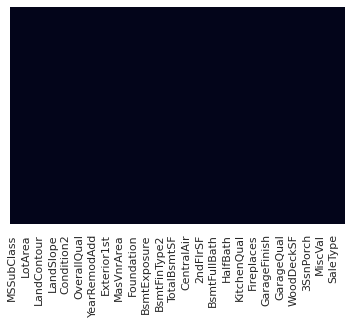

In [15]:
#Heat map to confirm that all the training data has been cleaned
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);


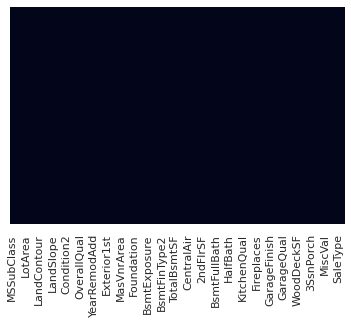

In [16]:
#Heat map to confirm that all the training data has been cleaned
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False);

# Data cleaning Summary


I was able to drop a few categories from the data set because of thier numerous missing values, I figured if most of that data wasnt collected, it wasnt important. For all the other values, I replaced the missing data with either the mean or mode of that category. As I was going through the data, I did notice that there was a lot of categorical data. Transforming that into useful information is going to difficult. 

# Data Analysis

In [17]:
#checking the different category types
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
#checking the different category types
df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [19]:
#identifying the features within the data
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  39 categorical + 36 numerical = 75 features


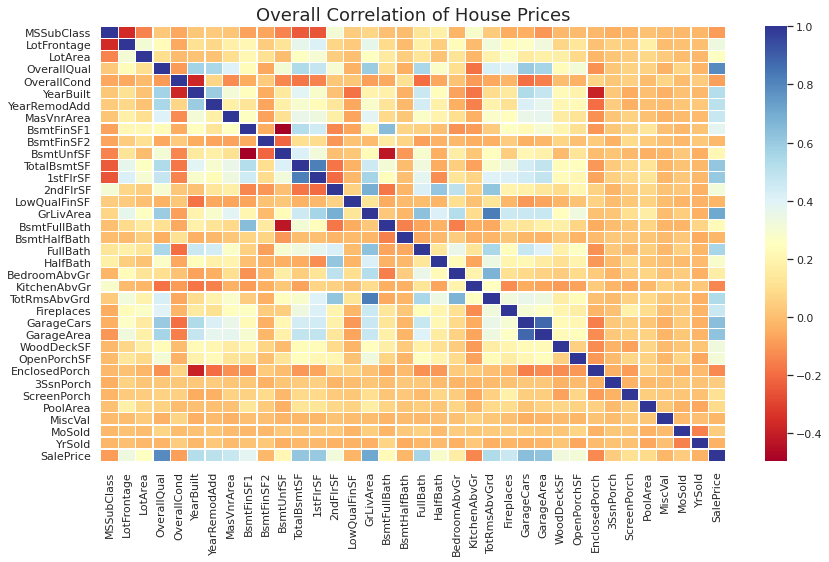

In [20]:
# Correlaton matrix to get a generalization of which categories have a positive or negative
# correlation with the house prices. 

# The categories with cooler colors have a stronger positive correlation, while the categories
# with the hotter colors have a negative correlation. 

corr = df.corr()
plt.figure(figsize=(14,8))
plt.title('Overall Correlation of House Prices', fontsize=18)
sns.heatmap(corr,annot=False,cmap='RdYlBu',linewidths=0.2,annot_kws={'size':20})
plt.show()

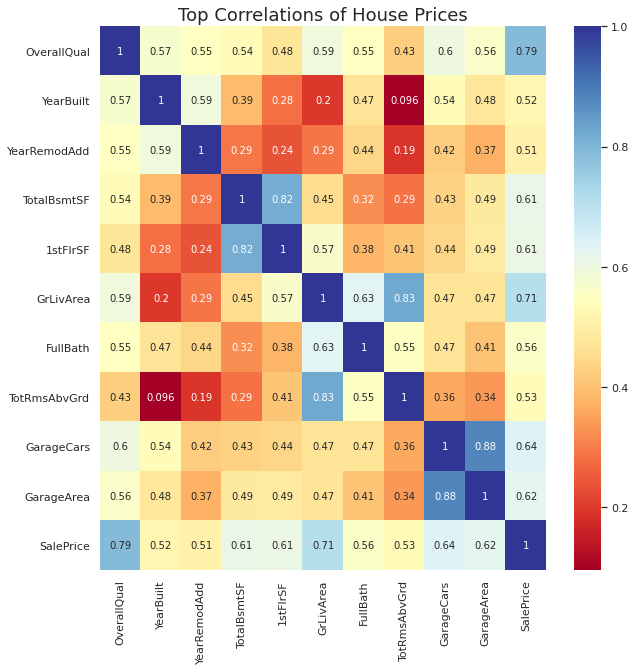

In [21]:
#top correlated categories
corr = df.corr()
top_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
plt.title('Top Correlations of House Prices', fontsize=18)
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu")
plt.show()

In [22]:
#list of categories that had the most correlation to Sales Price
most_corr = pd.DataFrame(top_corr_features)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,OverallQual
1,YearBuilt
2,YearRemodAdd
3,TotalBsmtSF
4,1stFlrSF
5,GrLivArea
6,FullBath
7,TotRmsAbvGrd
8,GarageCars
9,GarageArea


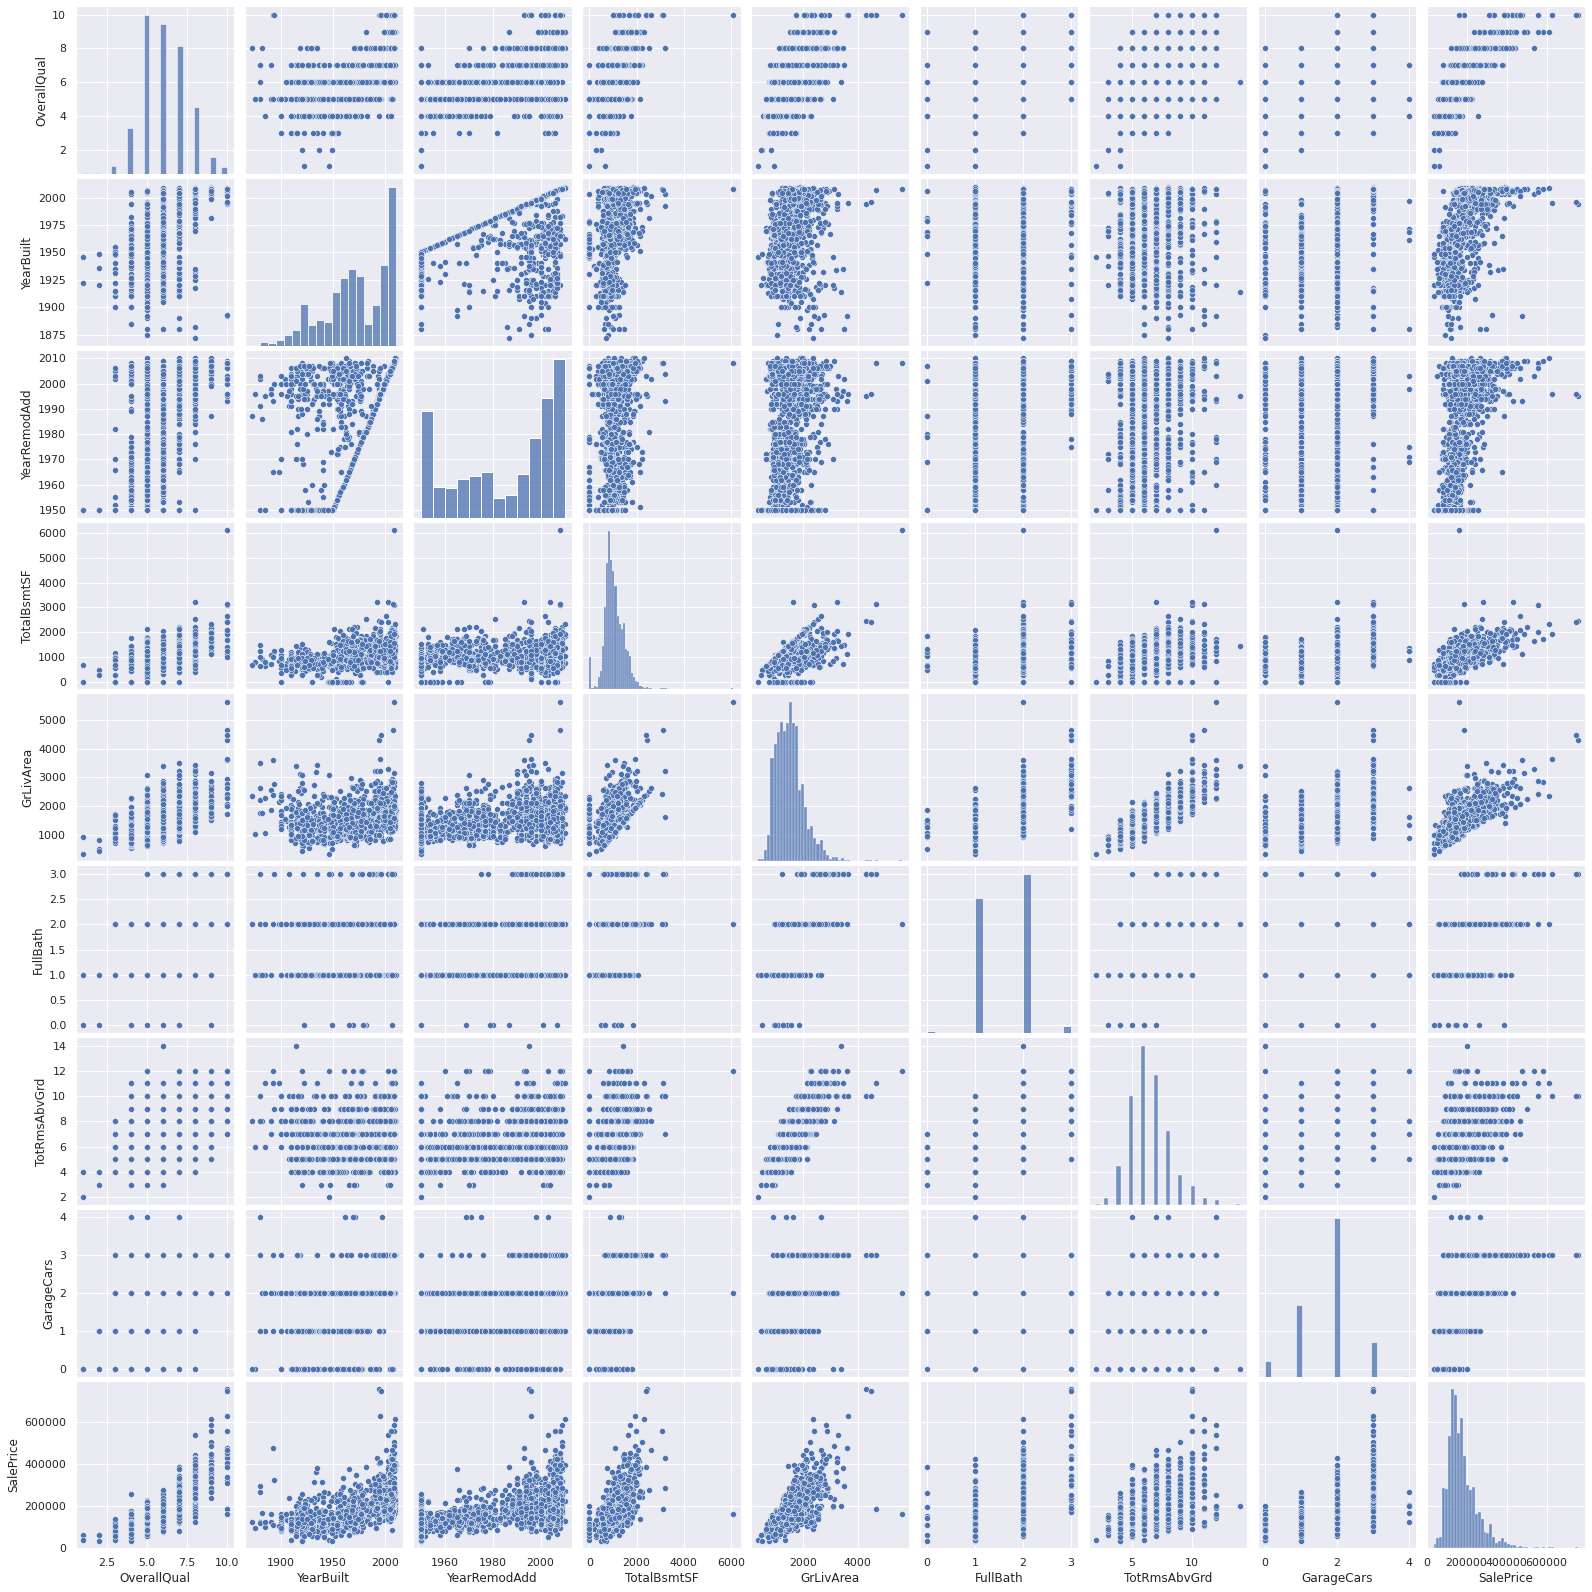

In [23]:
#We can see from this paired plot the correlations of the top categories. 
# you can see some outliers present from this data and we will investigate later on in the project
top_corr_Columns = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice']]
sns.pairplot(top_corr_Columns);

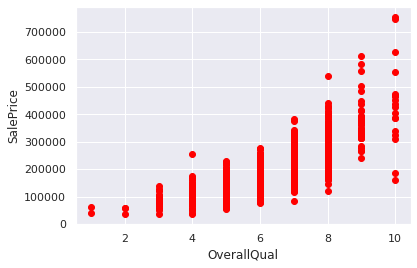

In [24]:
#The overall quality of the houses have the biggest impact on salesprice
plt.scatter(df.OverallQual, df.SalePrice, c = "red", marker = "o")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

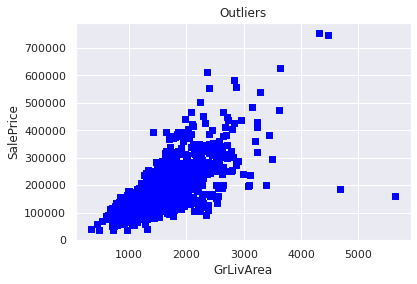

In [25]:
# looking for outliers
# the author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset.
# Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(df.GrLivArea, df.SalePrice, c = "blue", marker = "s")
plt.title("Outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()


df = df[df.GrLivArea < 4000]

### Checking for Skewed Data.
Since, all the categories have different ranges for thier values, we might need to change the data to have them relatively weighted the same

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180151.23 and sigma = 76670.25



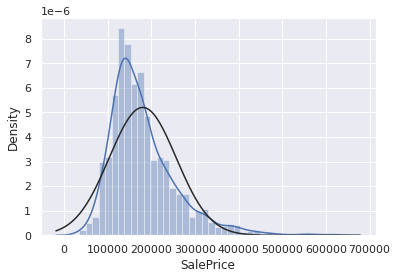

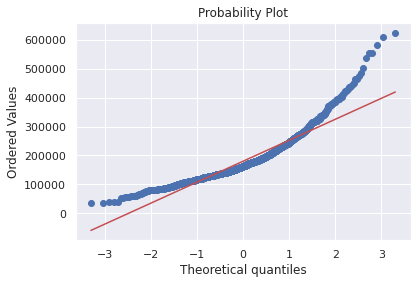

In [26]:
def check_skewness(col):
    sns.distplot(df[col] , fit=norm);
    fig = plt.figure();
    res = stats.probplot(df[col], plot=plt);
   
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[col]);
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    
check_skewness('SalePrice');

As we can see from the distribution plot, the data is rightly skewed. This will be addressed below

 ## fixing skewed data
From research, I found the best way to fix the data is to perform a log transformation of the data.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



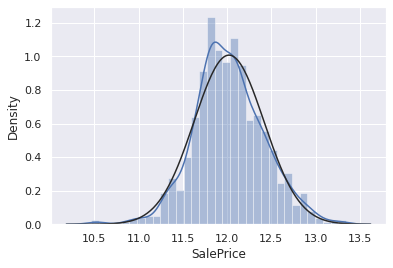

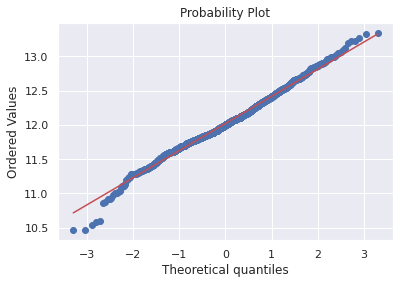

In [27]:
#  numpy fuction log1p applies log(1+x) to all elements of the column

df["SalePrice"] = np.log1p(df["SalePrice"])

check_skewness('SalePrice')

In [28]:
#combine the test and training data. 
#drop the SalesPrice column
ntrain = df.shape[0]
ntest = test_df.shape[0]
y_train = df.SalePrice.values
final_df = pd.concat((df,test_df)).reset_index(drop=True)
final_df.drop(['SalePrice'], axis=1, inplace=True) 

**Feature Engineering**

Data Transformation


In [29]:
#looking through the data during the cleaning process, I came across a few catagories that were a numerical datatype that should have been categorical.
#Overal Codition is a categorial data from 1-9.
final_df['OverallCond'].value_counts()


5    1642
6     530
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [30]:
#The year values will cause problems when modeling the data.
final_df['YrSold'].value_counts()

2007    689
2009    647
2008    621
2006    619
2010    339
Name: YrSold, dtype: int64

In [31]:
#Coverting OverallCond MSSubClass YrSold MoSold into categorical data, so they wont throw off the models

final_df['OverallCond'] = final_df['OverallCond'].astype(str)
final_df['MSSubClass'] = final_df['MSSubClass'].apply(str)
final_df['MoSold'] = final_df['MoSold'].astype(str)
final_df['YrSold'] = final_df['YrSold'].astype(str)


In [32]:
#using LabelEncoder, we will be converting the categorical data into numerical values 
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'FireplaceQu', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1')

#apply labelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(final_df[c].values)) 
    final_df[c] = lbl.transform(list(final_df[c].values))

# Check shape        
print('Shape all_data: ', final_df.shape)


Shape all_data:  (2915, 74)


In [33]:
final_df['TotalSF'] = final_df['TotalBsmtSF'] + final_df['1stFlrSF'] + final_df['2ndFlrSF']

## Determining any highly skewed features in data

In [34]:
num_features = final_df.dtypes[final_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = final_df[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094


In [35]:
#We are going to run a boxcox transormation on the data to help stabalize the varience that will make the data more normally distributed. This will allow for better 
# models. 
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feature in skewed_features:
    final_df[feature] = boxcox1p(final_df[feature], lam)

    final_df[feature] += 1

There are 55 skewed numerical features to Box Cox transform


In [36]:
# creating dummy categorials data
final_df = pd.get_dummies(final_df)
print(final_df.shape)

(2915, 212)


## Modeling

In [37]:
train = final_df[:ntrain]
test = final_df[ntrain:]

In [49]:
print("Training data shape: ", train.shape)
print("y_train shape: ", y_train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (1456, 212)
y_train shape:  (1456,)
Testing data shape:  (1459, 212)


In [39]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import lightgbm as lgb

## The use of Cross-Validation with K-folds

Cross validation is a good practice in finding some sort of assurance that your model develops the understanding of most of the patterns from the data collected. This method helps with lowing the noise gathered from the data. Using Kfolds allows the model to significantly reduce the bias and variance by dividing the data into k-subsets. Each subset is then used as a test set / validation set to form a training set. 

In [40]:
# Cross-validation with k-folds
#Kfold splits the train/test data into k consecutive folds
# cross val score evaluates a score by cross validation
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))

    return(rmse)

In [41]:
#simple LinearRegression Model
#Cross validation for regression model
n_folds = 5

def rmsle_cv_reg(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf)) #y_train for y

    return(rmse)

regressor = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(train, y_train, test_size = 0.3, random_state = 0)


## Different ML Models

Gradient Boosting was chosen becuase of its forward stage-wise fashion to building an additive model.It relies on the intuition of the best possible next model when combining with the previous models which will minimize overall prediction error.

XGBoost is a powerful decision-tree-based regression model that uses a gradient boosting framework. The model applies the principle of boosting weak learners using the gradient descent architecture.

LGBM - Light gradient boosting model, is another boosting framework that is very popular within the ML world.

There are many other models to choose from to run the regression tests, but the top producing scores came from the models that were gradient boosting and decision tree frameworks.

In [42]:
#Additional ML models

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [43]:
#Scores of all the Models
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
score = rmsle_cv_reg(regressor)
print("Linear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1161 (0.0087)

Xgboost score: 0.1191 (0.0066)

LGBM score: 0.1150 (0.0056)

Linear Regression score: 0.1267 (0.0084)



## Comparing the RSME Values

All the regression models were very close to one another. Even the simple Linear Regression model. The utilizing the Cross Validation method with K-folds played a huge role in the developing a model that was overfitted and created a low RSME score.

In [44]:
LinearReg_model = regressor.fit(X_train,Y_train)
GBoost_model = GBoost.fit(train.values,y_train) 
XGB_model = model_xgb.fit(train.values,y_train) 
LGBMReg_model = model_lgb.fit(train.values,y_train) 

## Finding the mean of all the model predictions
np.expm1 ( ) is used to calculate exp(x) - 1 for all elements in the array.

In [50]:
final_model = (np.expm1(GBoost_model.predict(test.values)) + np.expm1(XGB_model.predict(test.values)) + np.expm1(LGBMReg_model.predict(test.values))) / 3 

final_model

array([121191.0213534 , 154931.67841911, 182612.55954077, ...,
       159721.37260103, 116240.06114659, 216353.91287473])

In [52]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = final_model
sub.to_csv('/content/drive/MyDrive/kaggle/submission.csv',index=False)

# Conclusion

Inspecting and cleaning the data took the longest out of the entire project. It was fun to go through the categories and read about their values within the data description file. The dataset had a few columns where I just dropped them entirely. The rest of the N/A values were replaced with the mean / mode of their respected values. Developing the correlation matrix gave a solid look into which features were most important to the models. After doing some digging, I found that Overall Quality (Shocker) had the most impact to sales price. After my first go around with the dataset, I didn’t think to check for skewed data but after doing more reading on how I learned that the predictors with categorical values, all had different weighted values to them. Which could through off the model significantly. So, I went back and normalized the data by applying the Log1p NumPy function to all the columns. Figuring out how to properly encode the categorical data took a while to do. I spent many hours researching different methods and ultimately ended up using LabelEncoder. Which seemed to work better than all my other choices. The linear regression model was sufficient in getting a solid score, but what really made a difference was utilizing the cross-validation with k-folds. Kaggle’s community played a big part in my understanding of the data and this project. I read through many articles and notebooks researching what type of ML models would yield the best scores. This project was fun and interesting to get through. I realized that there is so much to Data Science and I have barely scratched the surface.

## Personal Info

**Kaggle**

User ID 6307723

Public Score .1223

Results Board: 758


**github repository:**

https://github.com/tyler-cranmer/DataSci_Kaggle.git 